# Multivariate Linear Regression Using Normal Equation

## Attribute Information: http://archive.ics.uci.edu/ml/datasets/Airfoil+Self-Noise#

### This problem has the following inputs: 
1. Frequency, in Hertzs. 
2. Angle of attack, in degrees. 
3. Chord length, in meters. 
4. Free-stream velocity, in meters per second. 
5. Suction side displacement thickness, in meters. 

### Predicts: 
6. Scaled sound pressure level, in decibels. 
    - ratio of the absolute, Sound Pressure and a reference level (usually the Threshold of Hearing)

In [1]:
import numpy as np
from numpy.linalg import inv

num_train_examples = 1502
train_input = np.loadtxt('airfoil_self_noise.dat',float,usecols=(0,1,2,3,4))[0:num_train_examples]
train_output = np.loadtxt('airfoil_self_noise.dat',float,usecols=(5))[0:num_train_examples]

In [2]:
test_input = np.loadtxt('airfoil_self_noise.dat',float,usecols=(0,1,2,3,4))[-1]
test_output = np.loadtxt('airfoil_self_noise.dat',float,usecols=(5))[-1]

In [3]:
def normal_equation(x,y):
    theta = np.dot(inv(np.dot(np.transpose(x),x)),np.dot(np.transpose(x),y))
    return theta
        
def avg_loss(x,y,theta): 
    m = x.shape[0]
    h = x.dot(theta.transpose())
    loss = h,(1/(2.0*m))*((np.square(h-y)).sum(axis=0))
    return loss

def train(x,y):
    theta = normal_equation(x,y)
    hypothesis, loss = avg_loss(x,y,theta)
    return theta

In [4]:
train_input = np.insert(train_input,0,np.ones(num_train_examples),axis=1) # add bias to features
theta = train(train_input,train_output) # trained parameters that give smallest cost function

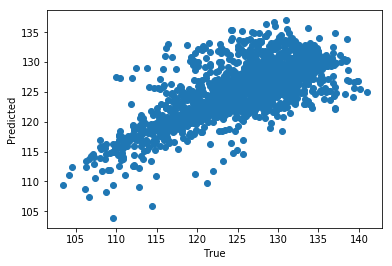

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

test_input = train_input[:,1:]
weights = theta[1:]
bias = theta[0]
plt.xlabel('True')
plt.ylabel('Predicted')
plt.scatter(train_output, np.dot(test_input,weights) + bias )
plt.show()